## Predicting Titanic Survival

In [36]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [37]:
dfML = pd.read_csv('cleandf_titanic.csv', index_col = 'PassengerId')
dfML.head(5)

,Survived,Pclass,Alone,AgeGroup,Sex_Coded,Embarked_Coded
PassengerId,,,,,,
1,0,3,0,2,0,3
2,1,1,0,3,1,1
3,1,3,1,2,1,3
4,1,1,0,3,1,3
5,0,3,1,3,0,3


In [38]:
dfML.columns

Index(['Survived', 'Pclass', 'Alone', 'AgeGroup', 'Sex_Coded',
       'Embarked_Coded'],
      dtype='object')

### Split data and train model

In [39]:
Y = dfML['Survived'].values
X = dfML.drop('Survived', axis =1).values

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

In [41]:
print('Train set:', X_train.shape, Y_train.shape)
print('Test test:', X_test.shape, Y_test.shape)

Train set: (499, 5) (499,)
Test test: (215, 5) (215,)


### Decision Tree Classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
#train model
DTC = DecisionTreeClassifier(criterion="entropy", max_depth = 5).fit(X_train,Y_train)
#make predictions
DTC_pred = DTC.predict(X_test)

In [53]:
from sklearn import metrics
print("Decision Trees's Accuracy: ", accuracy_score(Y_test, DTC_pred))

Decision Trees's Accuracy:  0.7906976744186046


### Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

# train model
RFC= RandomForestClassifier(n_estimators=20).fit(X_train, Y_train)
# predict on test set
RFC_pred = RFC.predict(X_test)
#check accuracy
print("Random Forest Classifier's Accuracy: ", accuracy_score(Y_test, RFC_pred))

Random Forest Classifier's Accuracy:  0.7627906976744186


### Log Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# train model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
# predict on test set
LR_pred = LR.predict(X_test)
# check accuracy score
print("Log Regression's Accuracy: ", accuracy_score(Y_test, LR_pred))
# calculate log loss
LR_pred_prob = LR.predict_proba(X_test)
print("Log Loss:",log_loss(Y_test, LR_pred_prob))

Log Regression's Accuracy:  0.6883720930232559
Log Loss: 0.5961526579404546


### SVM

In [52]:
from sklearn import svm, datasets

# train model
SVM = svm.SVC(kernel='linear', C=0.01).fit(X_train, Y_train)
# predict on test set
SVM_pred = SVM.predict(X_test)
# check accuracy score
print("SVM's Accuracy: ", accuracy_score(Y_test, SVM_pred))


SVM's Accuracy:  0.7488372093023256


### K Nearest Neighbor

In [57]:
#Check for best k
ks = [1, 3, 5, 7, 10, 20, 30, 40, 50]
mean_accuracy = {}

for k in ks:
    acc_score= np.zeros(3)
    
    for n in range(3): # to generate 3 random train/test split for each k
        X1_train, X1_test, Y1_train, Y1_test = train_test_split( X_train, Y_train, test_size=0.2)
        # train  and predict
        KNC = KNeighborsClassifier(n_neighbors = k).fit(X1_train,Y1_train)
        KNC_pred = KNC.predict(X1_test)
        # evaluate accuracy
        acc_score[n] = accuracy_score(Y1_test, KNC_pred)
    
    mean_accuracy[k] = round(acc_score.mean(),3)
    
df_compare = pd.DataFrame({'Mean Accuracy Score': mean_accuracy}, index = ks)
df_compare.index.name = 'k-values'
print(df_compare)

import re
highest = max(mean_accuracy.values())
k = {k for k, acc in mean_accuracy.items() if acc == highest}
k =re.sub("{|}","" , str(k))
print( "The best accuracy score was ",highest, "with k =",k) 

          Mean Accuracy Score
k-values                     
1                       0.733
3                       0.827
5                       0.773
7                       0.800
10                      0.830
20                      0.757
30                      0.777
40                      0.803
50                      0.800
The best accuracy score was  0.83 with k = 10


### Confusion Matrix

In [86]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

#Use Decision Tree Classifier - highest accuracy

def plot_confusion_matrix(Y_test, DTC_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(Y_test, DTC_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(Y_test, DTC_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation = 45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)


Confusion matrix, without normalization
[[112  12]
 [ 33  58]]


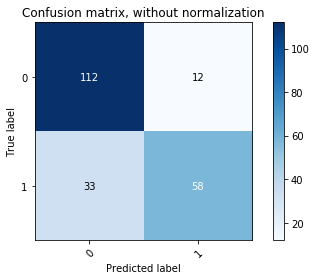

In [92]:
# Plot non-normalized confusion matrix
class_names = np.array([0,1])
plot_confusion_matrix(Y_test, DTC_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()



In [91]:
print("Decision Tree's accuracy_score: ",accuracy_score(Y_test, DTC_pred))
print("Decision Tree's f1_score: ",f1_score(Y_test, DTC_pred, average = 'weighted'))
print("Decision Tree's recall_score: ",recall_score(Y_test, DTC_pred, average = 'weighted'))
print (classification_report(Y_test, DTC_pred))

Decision Tree's accuracy_score:  0.7906976744186046
Decision Tree's f1_score:  0.7852173161279652
Decision Tree's recall_score:  0.7906976744186046
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       124
           1       0.83      0.64      0.72        91

   micro avg       0.79      0.79      0.79       215
   macro avg       0.80      0.77      0.78       215
weighted avg       0.80      0.79      0.79       215

